In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math 

In [15]:
data = np.loadtxt('s_wave_data.txt')
time_val = np.array (data[:,0])
vel_val =np.array( data[:,1])
print ("time_val:",time_val,"\nvel_val", vel_val)

time_val: [ 0.    0.01  0.02 ...  9.98  9.99 10.  ] 
vel_val [ 0.00000e+00  7.39600e-02  1.41848e-01 ... -4.90000e-05 -2.50000e-05
  0.00000e+00]


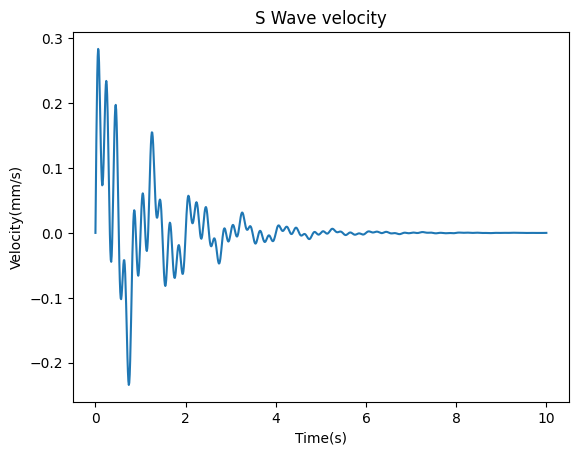

In [16]:
fig, ax =plt.subplots()
ax.plot(time_val,vel_val)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Velocity(mm/s)")
ax.set_title("S Wave velocity")
plt.show()

In [48]:
max_abs_vel = max(abs(vel_val))
print (len(vel_val))
cutoff = max_abs_vel * 0.005
cut_vel = []
cut_time = []
for i in vel_val:
    if i > cutoff:
        cut_vel.append(i)
        cut_time.append(i)
cut_vel = np.array(cut_vel)
cut_time = np.array(cut_time)
#print(cut_vel)  
print(cutoff)
print (len(cut_vel))
print (len(cut_time))



1001
0.001416285
284
284


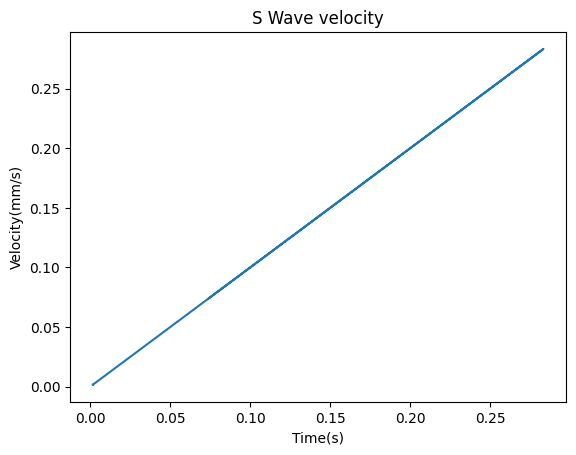

In [56]:
fig, ax =plt.subplots()
ax.plot(cut_time,cut_vel)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Velocity(mm/s)")
ax.set_title("S Wave velocity")
plt.show()

In [17]:
def trap_rule(time_val,vel_val):
    n = len(time_val)-1
    a = time_val[0]
    b = time_val[-1]
    sum1=0
    i=1
    while i < n:
        sum1 += vel_val[i]
        i += 1

    integral_val = ((b-a)/(2*n))*(vel_val[0] + 2*sum1 + vel_val[n])
    return integral_val


In [22]:
def simp_third (time_val,vel_val): 
    n = len(time_val) -1
    a = time_val[0]
    b = time_val[-1]
    sum1=0
    sum2=0
    i =1
    while i<((n/2)-1):
        sum1+= vel_val[(2*i)-1]
        sum2+= vel_val [2*i]
        i+=1
    sum1+= vel_val [(2*i)-1]

    integral_value = ((b-a)/(3*n))*(vel_val[0] + 4*sum1 +2*sum2 + vel_val[n])

    return(integral_value)

        

In [ ]:
def simp_three_eight(time_val,vel_val):
    n = len(time_val) -1
    a = time_val[0]
    b = time_val[-1]
    sum1=0
    sum2=0
    i =1

In [50]:
nptrap = np.trapezoid(cut_vel,cut_time)
print(nptrap)
integral_value = trap_rule(cut_time,cut_vel)
print (integral_value)

scipysimp = integrate.simpson(cut_vel,cut_time)
print(scipysimp)
integral_value = simp_third(cut_time,cut_vel)
print (integral_value)

-0.0027338286755
-0.0030566201817332135
-0.002733828675499998
-0.0030573851889316864


In [55]:
print(cut_time)

[0.07396  0.141848 0.199385 0.243265 0.271437 0.283257 0.27951  0.262289
 0.234761 0.20083  0.164746 0.13068  0.102327 0.082561 0.073183 0.074775
 0.08668  0.10711  0.133355 0.162087 0.189719 0.212777 0.228264 0.233962
 0.228663 0.21228  0.185863 0.151486 0.112044 0.070963 0.031865 0.013163
 0.047937 0.085364 0.121858 0.153944 0.178584 0.193446 0.197103 0.189154
 0.170229 0.141907 0.106545 0.067032 0.026505 0.016634 0.029843 0.034908
 0.032238 0.022932 0.008654 0.019286 0.036407 0.049759 0.058148 0.060911
 0.05798  0.049882 0.037685 0.022891 0.007282 0.003337 0.024082 0.047844
 0.072831 0.09713  0.118895 0.136507 0.14872  0.154771 0.154433 0.14803
 0.136382 0.120726 0.102577 0.083582 0.065361 0.049349 0.036666 0.028021
 0.023657 0.023341 0.026405 0.03183  0.038356 0.044627 0.049326 0.05132
 0.049772 0.044231 0.034674 0.021512 0.005548 0.005689 0.012746 0.015736
 0.014494 0.009252 0.014932 0.028639 0.040255 0.049114 0.054802 0.057189
 0.056432 0.052955 0.047397 0.040547 0.033262 0.02638

In [54]:
sq_vel = cut_vel**2
print(min(sq_vel))
print(min(cut_time))
nptrap = np.trapezoid(sq_vel,cut_time)
print(nptrap)
integral_value = trap_rule(cut_time,sq_vel)
print (integral_value)

scipysimp = integrate.simpson(sq_vel,cut_time)
print(scipysimp)
integral_value = simp_third(cut_time,sq_vel)
print (integral_value)

2.024929e-06
0.001423
-8.788432468523192e-05
-0.00040438226945875165
-0.00013485448686010413
-0.00040463015467453957


In [ ]:
def avg_sq_vel()